<a href="https://colab.research.google.com/github/VictorBelle38/User_Streaming/blob/main/User_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Understanding

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/streaming_data.csv')

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [ ]:
print(f"{df.shape[0]} linhas e {df.shape[1]} colunas")

77884 linhas e 10 colunas


In [ ]:
print(df.dtypes)

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object


In [ ]:
display(df.describe())

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
print(df.isnull().sum())

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64


## Data Preparation

In [ ]:
#Substituição dos Valoresa NaN por 0 e remoção de valorores nulos nas colunas, gender, age e subscription
cols_fill_zero = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[cols_fill_zero] = df[cols_fill_zero].fillna(0)
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

In [ ]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

In [ ]:
float_cols = df.select_dtypes(include='float').columns
df[float_cols] = df[float_cols].astype(int)

In [ ]:
display(df.head())

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
print(df.isnull().sum())

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64


In [ ]:
print(df.dtypes)

Age                        int64
Gender                    object
Time_on_platform           int64
Devices_connected          int64
Subscription_type         object
Num_streaming_services     int64
Num_active_profiles        int64
Avg_rating                 int64
Churned                   object
User_id                   object
dtype: object


## Modelagem dos Dados - Regressão Logistica



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])  # Ex: Male = 1, Female = 0
df_encoded['Churned'] = df_encoded['Churned'].map({'No': 0, 'Yes': 1})  # Target

In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=['Subscription_type'], drop_first=True)

In [ ]:
#Definindo X (variáveis preditoras) e y (variável alvo)
X = df_encoded.drop(['User_id', 'Churned'], axis=1)
y = df_encoded['Churned']

In [ ]:
#Normalizando os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

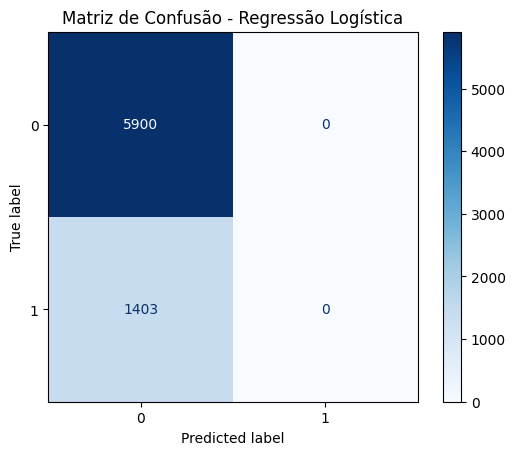

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Criando e treinando o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

#Fazendo previsões
y_pred = model.predict(X_test)

#Exibindo a matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

## Modelagem com Random Forest + GridSearch

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
#Definição de Hiperparametros no Gridsearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
#Criando o gridsearch e realizando o fit com dados de treino
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1,
    scoring='f1'
)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [ ]:
best_params = grid_search.best_estimator_.get_params()
print(" Melhores parâmetros encontrados:")
for param, value in best_params.items():
    print(f"{param}: {value}")

 Melhores parâmetros encontrados:
bootstrap: False
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 200
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [ ]:
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

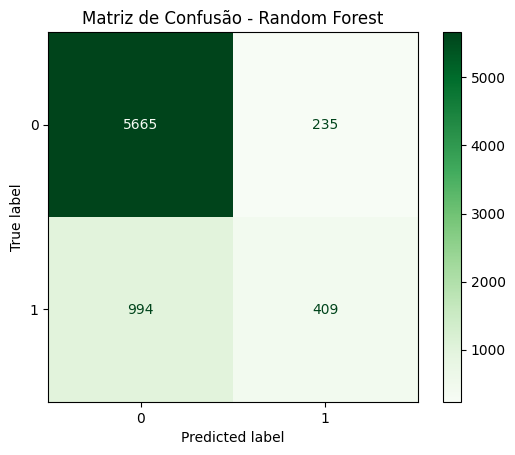

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.show()

In [ ]:
print("Métricas do Modelo Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['Não Cancelou', 'Cancelou']))

Métricas do Modelo Random Forest:
              precision    recall  f1-score   support

Não Cancelou       0.85      0.96      0.90      5900
    Cancelou       0.64      0.29      0.40      1403

    accuracy                           0.83      7303
   macro avg       0.74      0.63      0.65      7303
weighted avg       0.81      0.83      0.81      7303

